### Encoding  16*16 image using 4 qubits
### Dataset Used is Bell Pepper from PlantVillage

In [1]:
import qiskit
from qiskit import transpile, assemble
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit import BasicAer, Aer, execute
from qiskit.quantum_info import state_fidelity
from qiskit.visualization import *
from qiskit.quantum_info.operators import Operator
import numpy as np
import matplotlib.pyplot as plt
from qiskit.circuit.parameter import Parameter
import torch
from torch.autograd import Function
from torchvision import datasets, transforms
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector

import cv2

import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit.circuit.library import TwoLocal, NLocal, RealAmplitudes, EfficientSU2
from qiskit.circuit.library import HGate, RXGate, RYGate, RZGate, CXGate, CRXGate, CRZGate
import random


from qiskit.circuit.parameter import Parameter
from qiskit_machine_learning.neural_networks import CircuitQNN, TwoLayerQNN
from qiskit_machine_learning.connectors import TorchConnector
from qiskit.utils import QuantumInstance, algorithm_globals
import torch.nn as nn
from torch.nn import Linear, CrossEntropyLoss, MSELoss
from torch.optim import LBFGS, SGD,Adam 
qi = QuantumInstance(Aer.get_backend("aer_simulator_statevector"))
algorithm_globals.random_seed = 42
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit.algorithms.optimizers import COBYLA, L_BFGS_B

In [2]:
path = os.listdir('PlantVillage/')
classes = {'Pepper__bell___healthy':0, 'Pepper__bell___Bacterial_spot':1}

In [3]:
#Resizing the image to 16*16
X = [] #Image Array
Y = [] #Class(Label) Array
for cls in classes:
    pth = 'PlantVillage/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (16,16))
        X.append(img)
        Y.append(classes[cls])

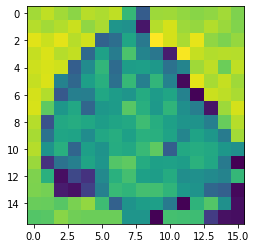

In [4]:
plt.imshow(X[0])

In [4]:
#Shape of Image
np.array(X).shape

(2334, 16, 16)

In [5]:
#All output labels
print(Y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [6]:
# 16*16 Image Array for the first datapoint
print(X[0])

[[181 189 181 174 187 184 189 143  68 179 180 176 173 175 181 170]
 [186 181 185 192 175 183 114 111  23 186 195 179 177 185 178 171]
 [199 192 200 187 194  73  82 127  91 208 195 183 201 175 169 177]
 [191 197 186 190  78 124  94 152 100  89  27 206 191 185 187 186]
 [193 196 194  70 106 141  80 121 122 116  85 100 180 188 164 189]
 [191 197  98  77 122 135  84 143  96 141  98  16 200 182 191 180]
 [195 185  66  96  95 128 120 114 132 119 127  98  13 192 188 183]
 [196 159 115 129  76 115 119 157 135 117 140 109  95  22 179 195]
 [186  61 130 133 128 121 126 130 147 134 123 113 112  96 162 186]
 [182  85 127 125 107 129 134 123 136 135 125 101 125 115  93 181]
 [186 113 135  75 122 112 133 130 144 159  70 130 133 130 115 110]
 [178  39  85  96 126 114 155 159 132 123 124 121 137 129  92  11]
 [170 136  19  54  40 104 136 149 123 121 132 108 110 105  99 142]
 [169 167  26  21  49  97 144 140 149 148 140 116 112  77  71  15]
 [163 162 157 168 176 147  72 112 121 122  92  12 139 155 110 

In [7]:
#Shuffling the dataset for training and testing
from random import shuffle
X_rad = random.shuffle(X)
Y_rad = random.shuffle(Y)

In [8]:
print(X[0])

[[ 96 123 132 126 109 129 106  23 119 128 122  98 121 117 117 104]
 [110 121 125 135 126 104  98  23  18 128 100 107 112 120 136 107]
 [140 132 115 106 119  79  22  18 151 124  32 147 117 138 113 115]
 [140 128 119 129 120  22  19 155 122  43  36 109 128 144 124 134]
 [143 140 162  50  23  22 147 125  75  47  54  55 155 130 161 133]
 [138 168 183  26  18 146  57  79  87  25  72  86  67 141 155 144]
 [164 140 137  18 165  60  35  82 134  35  98  80  73 116 100 145]
 [173 143 114 112 119  66  82  92 135  38  83 102 163  79 169 167]
 [150 134  53  86  78 124  58 103  77  83  36  83  67 176 165 149]
 [167  24  89 116  60 109  99 105 194  57  28 109 146 158  70 180]
 [163  27 144 117 107 101 122  84  33 137  27 148 167  31  42 158]
 [168 178  90  92 115 130  68  74  45  94 152 174 110  99  38 188]
 [188 178  54  84 125  90 104  88  30 106 128 117  95  67  51 181]
 [181 181  38  55  98 145  88  89  52 132 117 154  52  25 198 196]
 [187 186 170 180 160 153  92  99  68 130  82 104 165 193 207 

In [9]:
print(Y)

[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 

In [11]:
Xdata = [X[i] for i in range(375)]
Ydata = [Y[i] for i in range(375)]
len(Xdata)
np.array(Xdata).shape

(375, 16, 16)

In [12]:
def normalization(data):
    #Create Array of pixel value
    testdata=data
    arr_data=testdata.flatten()/max(testdata.flatten());
    encoding_data= np.array([np.round(x,6) for x in arr_data]);
    sum_const=np.sqrt(sum(encoding_data*encoding_data))
    encoding_norm=encoding_data/sum_const
    return encoding_norm

In [13]:
# Building a custom feature map for encoding the image using Qiskit's 
# TwoLocal(https://qiskit.org/documentation/stubs/qiskit.circuit.library.TwoLocal.html) Function
def feature_map(qc,reps):
    nqubits=4
    qr = QuantumRegister(nqubits)
    qc = QuantumCircuit(qr, name='Embed')
    for i in range(nqubits):
        qc.h(i) # Adding an initial layer of Hadamard Gates
    twolocal = TwoLocal(num_qubits=nqubits, reps=reps, rotation_blocks=['ry','rz'], 
               entanglement_blocks='cx', entanglement='linear', 
               parameter_prefix='x', insert_barriers=True)
    circuit = qc.compose(twolocal)
    circuit.to_instruction()
    return circuit

In [14]:
qc = QuantumCircuit(4)
zz_map = feature_map(qc,31) # Reps used are 31 because it encodes all the 16*16 = 256 datapoints

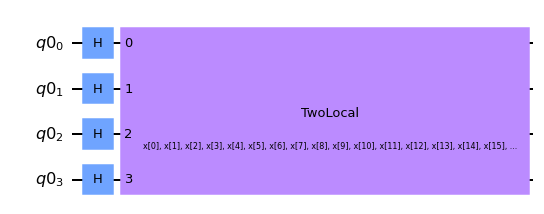

In [15]:
zz_map.draw(output="mpl")

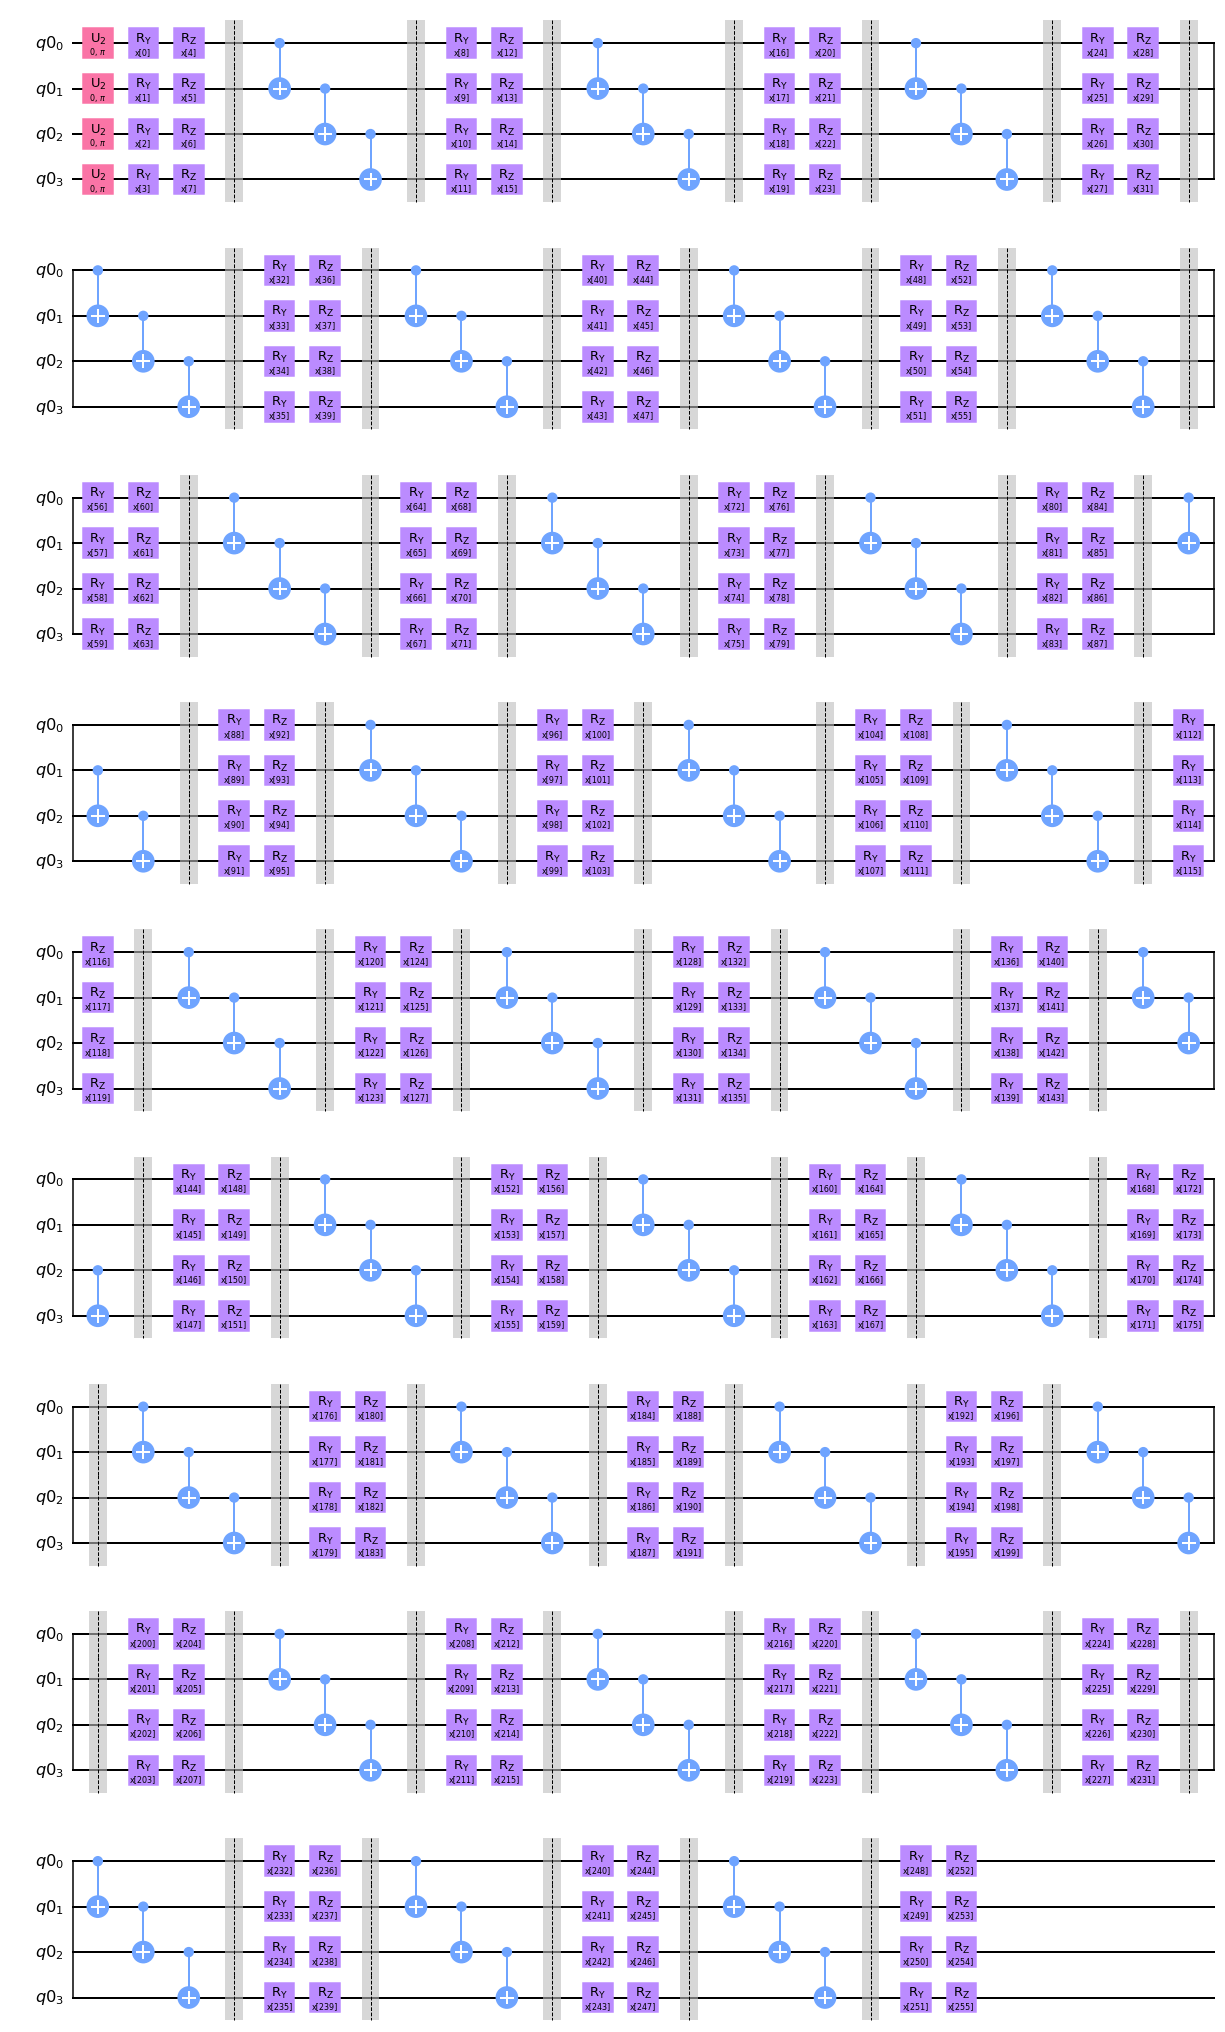

In [16]:
# A decomposed view of the above circuit showing all the 256 datapoints
zz_map.decompose().draw(output="mpl")

In [17]:
# Choose a PQC from this paper https://arxiv.org/pdf/1905.10876.pdf circuit no.15
def MERACircuit(qc,theta):
    nqubits=4
    qr = QuantumRegister(nqubits)
    qc = QuantumCircuit(qr, name='PQC')

    count=0


    for i in range(nqubits):
        qc.ry(theta[count],i)
        count=count+1
    for i in range(nqubits-1):
        qc.cx(i,i+1)
    
    qc.cx(0,nqubits-1)
    for i in range(nqubits):
        qc.ry(theta[count],i)
        count=count+1    
    for i in range(nqubits-1):
        qc.cx(i+1,i)
    qc.cx(nqubits-1,0)
    qc.to_instruction()
    return qc

In [18]:
from math import pi
# Choose a PQC from this paper https://arxiv.org/pdf/1905.10876.pdf circuit no.15
def MERACircuitupd(qc,theta):
    nqubits=4
    qr = QuantumRegister(nqubits)
    qc = QuantumCircuit(qr, name='PQC')

    count=0


    for i in range(nqubits):
        qc.ry(theta[count],i)
        count=count+1
    for i in range(nqubits-1):
        qc.cx(i,i+1)
    
    qc.cx(0,nqubits-1)
    for i in range(nqubits):
        qc.ry(theta[count],i)
        count=count+1    
    for i in range(nqubits-1):
        qc.cx(i+1,i)
    qc.cx(nqubits-1,0)
    
    for i in range(nqubits):
        qc.ry(theta[count],i)
        count=count+1
    for i in range(nqubits-1):
        qc.cx(i,i+1)
    
    qc.cx(0,nqubits-1)
    for i in range(nqubits):
        qc.ry(theta[count],i)
        count=count+1    
    for i in range(nqubits-1):
        qc.cx(i+1,i)
    qc.cx(nqubits-1,0)    
    qc.to_instruction()
    return qc

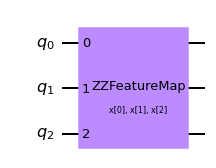

In [5]:
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
fm = ZZFeatureMap(3, reps=2)
fm.draw(output="mpl")

In [19]:
#Preparing parametric datapoints for MERA Circuit
nqubits=4
param_y=[];
for i in range(nqubits*4):
    param_y.append(Parameter('θ'+str(i)))

In [20]:
ansatz=MERACircuitupd(qc,param_y)

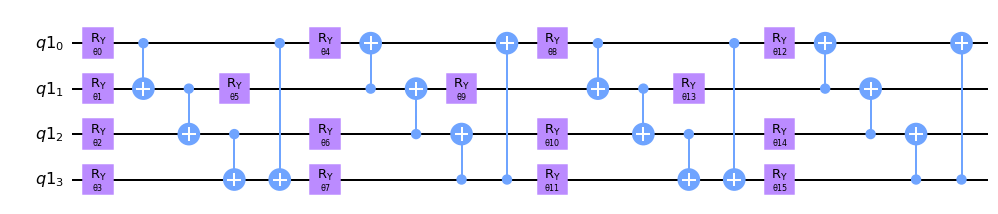

In [21]:
ansatz.draw(output="mpl")

In [22]:
# Combining the feature map and MERA Circuit
final_circuit = zz_map.compose(ansatz)

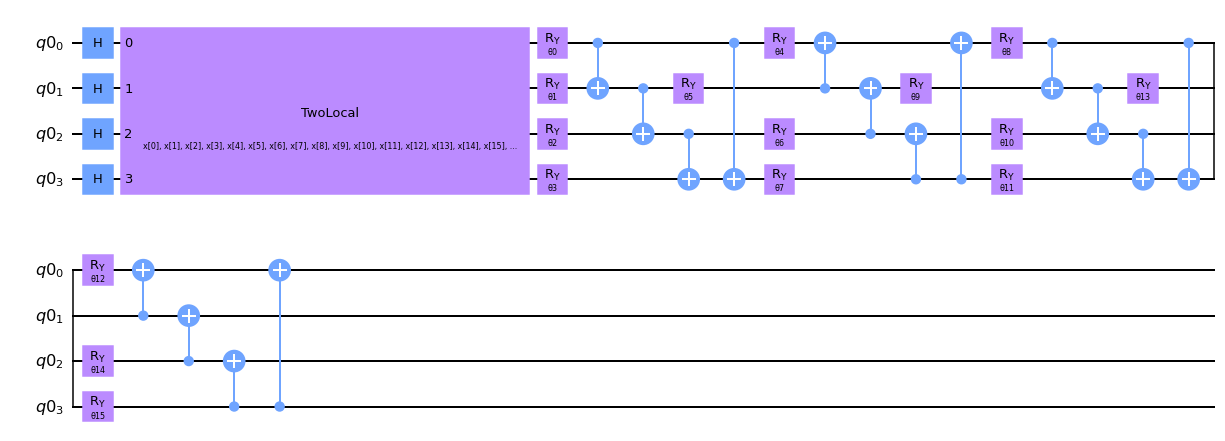

In [23]:
final_circuit.draw(output="mpl")

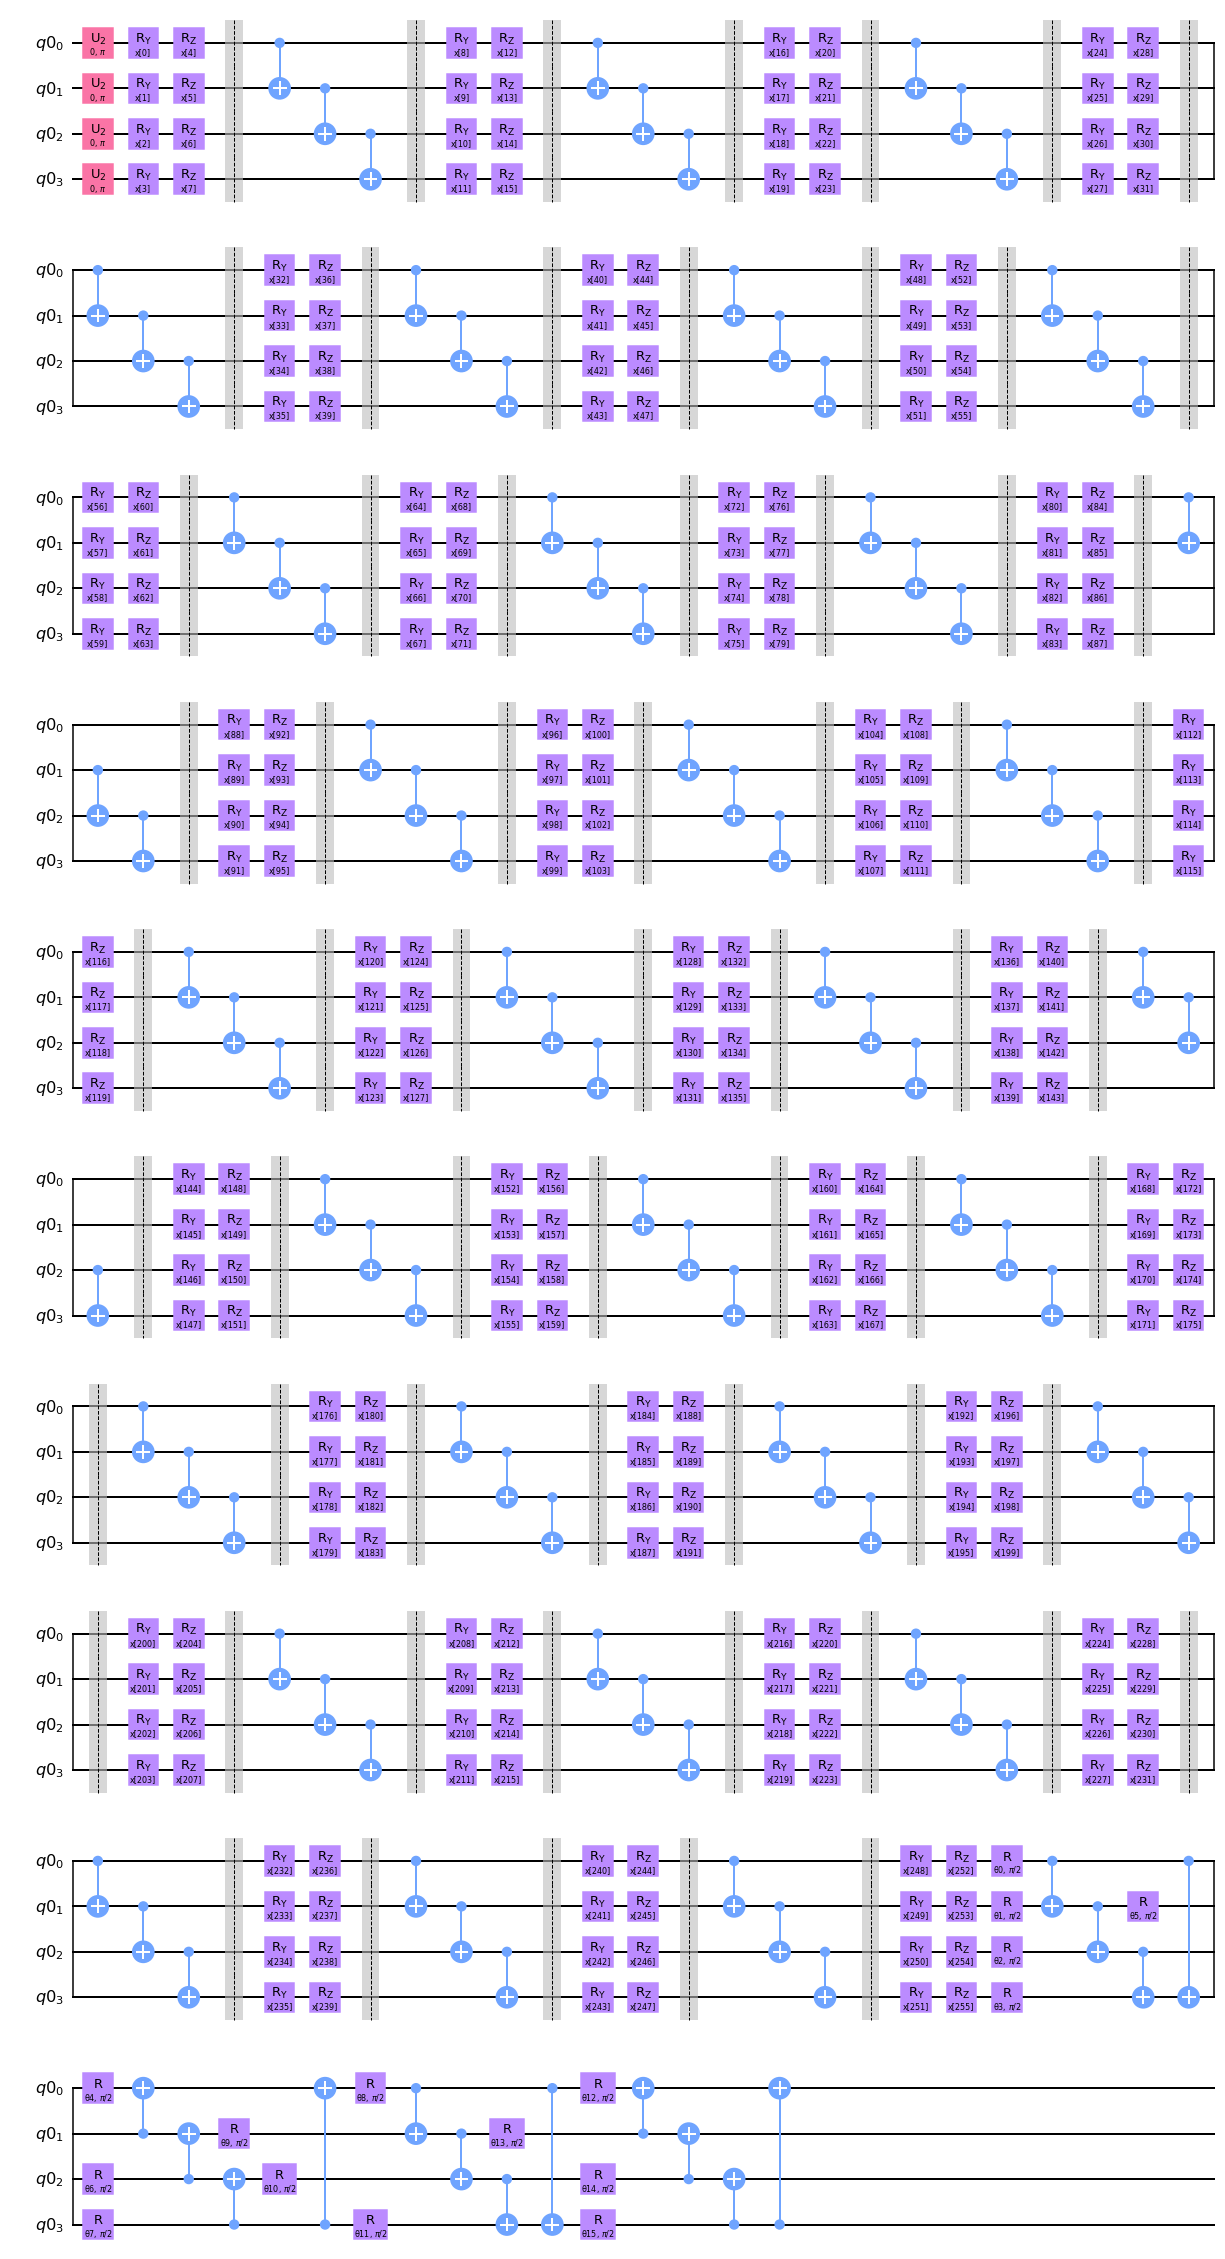

In [24]:
# A decomposed view of the our final circuit
final_circuit.decompose().draw(output="mpl")

In [31]:
map_z = ZZFeatureMap(256)

In [25]:
# Using Qiskit's CircuitQNN Function to build the model
parity = lambda x: "{:b}".format(x).count("1") % 2
output_shape = 2  # parity = 0, 1
qnn = CircuitQNN(
    final_circuit,
    input_params=zz_map.parameters,
    weight_params=ansatz.parameters,
    interpret=parity,
    output_shape=output_shape,
    quantum_instance=qi,
)

In [26]:
initial_weights = 0.1*(2*np.random.rand(qnn.num_weights) - 1)
print("Initial weights: ", initial_weights)
model = TorchConnector(qnn, initial_weights)

Initial weights:  [-0.06260789  0.05624301 -0.00896042 -0.01358211 -0.02411017 -0.09763866
 -0.09822285  0.03982473  0.01454543 -0.09399002 -0.02864935  0.00926585
 -0.03577184  0.06302892  0.04279948  0.05612889]


In [51]:
input1 = algorithm_globals.random.random(qnn.num_inputs)
weights1 = algorithm_globals.random.random(qnn.num_weights)

In [52]:
qnn.forward(input1, weights1)

array([[0.38879161, 0.61120839]])

In [54]:
qnn.backward(input1, weights1)

(None,
 array([[[ 2.56928730e-02,  1.22357440e-01, -2.35856578e-02,
           1.13734900e-01, -2.17854796e-01,  4.85722573e-17,
          -6.93889390e-18,  3.55383413e-02,  1.91333041e-02,
          -4.09620877e-03, -6.45636517e-02, -1.43324905e-01,
          -2.29864710e-02, -1.55132166e-01,  1.53657862e-02,
          -1.12275302e-02],
         [-2.56928730e-02, -1.22357440e-01,  2.35856578e-02,
          -1.13734900e-01,  2.17854796e-01,  2.77555756e-17,
           6.93889390e-18, -3.55383413e-02, -1.91333041e-02,
           4.09620877e-03,  6.45636517e-02,  1.43324905e-01,
           2.29864710e-02,  1.55132166e-01, -1.53657862e-02,
           1.12275302e-02]]]))

In [29]:
# 60% Training
Xtrain= [normalization(Xdata[i].flatten()) for i in range(round((0.6*len(Xdata))))]
Ytrain= [Ydata[i] for i in range(round(0.6*len(Ydata)))]
len(Xtrain)
np.array(Xtrain).shape

(225, 256)

In [31]:
# 40% Training
Xtest= [normalization(Xdata[i].flatten()) for i in range(round(0.4*len(Xdata)))]
Ytest= [Ydata[i] for i in range(round(0.4*len(Ydata)))]
len(Xtest)
np.array(Xtest).shape

(150, 256)

In [45]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [63]:
Xtrain_500 = [normalization(X[i].flatten()) for i in range(500)]
Ytrain_500 = [Y[i] for i in range(500)]
len(Xtrain_500)
np.array(Xtrain_500).shape

(500, 256)

In [32]:
model1 = TorchConnector(qnn, initial_weights)

optimizer = optim.Adam(model1.parameters(), lr=0.001)
f_loss = CrossEntropyLoss()

In [34]:
from torch import Tensor
# Before training
y_predict = []
for x in Xtrain:
    output = model1(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(Ytrain))/len(np.array(Ytrain)))

Accuracy: 0.43555555555555553


In [42]:
epochs = 20  # Set number of epochs
loss_list = []  # Store loss history
model1.train() 

TorchConnector()

In [43]:
for epoch in range(epochs):
    optimizer.zero_grad()  # Initialize gradient
    total_loss = []
    for x, y_target in zip(Xtrain, Ytrain):
        output = model1(Tensor(x)).reshape(1, 2)   # Forward pass
        loss = f_loss(output, Tensor([y_target]).long())  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize weights
        total_loss.append(loss.item())  # Store loss
    loss_list.append(sum(total_loss) / len(total_loss))
    print("Training [{:.0f}%]\tLoss: {:.4f}".format(100.0 * (epoch + 1) / epochs, loss_list[-1]))

Training [5%]	Loss: 0.6921
Training [10%]	Loss: 0.6920
Training [15%]	Loss: 0.6920
Training [20%]	Loss: 0.6920
Training [25%]	Loss: 0.6920
Training [30%]	Loss: 0.6920
Training [35%]	Loss: 0.6919
Training [40%]	Loss: 0.6920
Training [45%]	Loss: 0.6919
Training [50%]	Loss: 0.6920
Training [55%]	Loss: 0.6919
Training [60%]	Loss: 0.6920
Training [65%]	Loss: 0.6919
Training [70%]	Loss: 0.6919
Training [75%]	Loss: 0.6926
Training [80%]	Loss: 0.6921
Training [85%]	Loss: 0.6913
Training [90%]	Loss: 0.6917
Training [95%]	Loss: 0.6909
Training [100%]	Loss: 0.6912


In [45]:
# After training
y_predict = []
for x in Xtest:
    output = model1(Tensor(x))
    y_predict += [np.argmax(output.detach().numpy())]

print('Accuracy:', sum(y_predict == np.array(Ytest))/len(np.array(Ytest)))

Accuracy: 0.6066666666666667


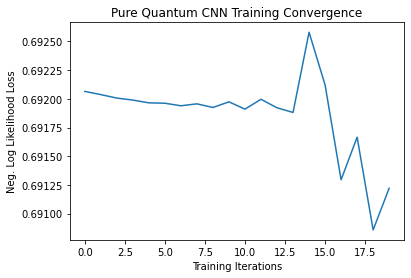

In [48]:
plt.plot(loss_list)
plt.title("Pure Quantum CNN Training Convergence")
plt.xlabel("Training Iterations")
plt.ylabel("Neg. Log Likelihood Loss")
plt.show()